OK, so this dataset is completely new to me. The idea here is to show that, in Python Pandas, with just a few lines of code, you can get an high level view of a dataset. This example uses a dataset I googled. It contains player information from the famous foutball game FIFA 2018. This set provides a lot of player statistics. 

In [42]:
## Basic library import (Pandas)
import pandas as pd

## Iport libraries for viasuals, just to give some insight in data visualisation:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
## Step 1: We import the CSV file with one line of code and present the first few rows in the Notebook.
df = pd.read_csv('C:\\Users\\LTF\\CompleteDataset.csv', sep = ',') 
df.head()

C:\Users\LTF\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DtypeWarning is actually proof that the set is completely new to me. This is the sort of thing that we actually cope with in data analysis. In this case, we will use the columns that do make sense and leave some issues behind us, to keep within the scope of this Notebook.

In [62]:
## Ok, so that's 75 columns. Difficult to graps at once. Let's first look at these column names to find anything relevant.
## Step 2: Basic exploration of the set.
list(df)

['Unnamed: 0',
 'Name',
 'Age',
 'Photo',
 'Nationality',
 'Flag',
 'Overall',
 'Potential',
 'Club',
 'Club Logo',
 'Value',
 'Wage',
 'Special',
 'Acceleration',
 'Aggression',
 'Agility',
 'Balance',
 'Ball control',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'Finishing',
 'Free kick accuracy',
 'GK diving',
 'GK handling',
 'GK kicking',
 'GK positioning',
 'GK reflexes',
 'Heading accuracy',
 'Interceptions',
 'Jumping',
 'Long passing',
 'Long shots',
 'Marking',
 'Penalties',
 'Positioning',
 'Reactions',
 'Short passing',
 'Shot power',
 'Sliding tackle',
 'Sprint speed',
 'Stamina',
 'Standing tackle',
 'Strength',
 'Vision',
 'Volleys',
 'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'ID',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'Preferred Positions',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST']

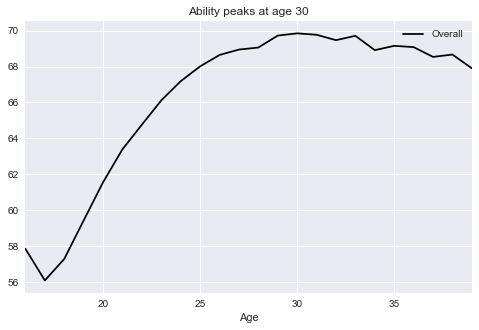

In [135]:
## Step 3: We want to figure out the interaction between a players age and their overall ability. 
## With just two lines of code we create a subset containing Age and Overall ability and we set up some basic visual.

Set = df[df.Age < 40][['Age', 'Overall']]
Graph = Set.groupby('Age').mean().plot(kind = 'line', figsize =(8,5), title = 'Ability peaks at age 30', colormap = 'copper')

In [63]:
## Lets see what the datatypes are. Mostly because we want to explore some correlations between different columns next. 
## We therefor need to find numeric columns.
df.dtypes

Unnamed: 0               int64
Name                    object
Age                      int64
Photo                   object
Nationality             object
Flag                    object
Overall                  int64
Potential                int64
Club                    object
Club Logo               object
Value                   object
Wage                    object
Special                  int64
Acceleration            object
Aggression              object
Agility                 object
Balance                 object
Ball control            object
Composure               object
Crossing                object
Curve                   object
Dribbling               object
Finishing               object
Free kick accuracy      object
GK diving               object
GK handling             object
GK kicking              object
GK positioning          object
GK reflexes             object
Heading accuracy        object
                        ...   
Vision                  object
Volleys 

In [67]:
## Step 4: Correlation
## Let's define a few variables in the dataset and see how they are correlated. Again, less is more, two lines of code:

CorrelationSet = df[['Age', 'Overall', 'Potential', 'Special']]
Correlation = CorrelationSet.corr()
print (Correlation)

                Age   Overall  Potential   Special
Age        1.000000  0.459765  -0.218264  0.238667
Overall    0.459765  1.000000   0.683474  0.604092
Potential -0.218264  0.683474   1.000000  0.399511
Special    0.238667  0.604092   0.399511  1.000000


,Age,Overall,Potential,Special
Age,1.000000,0.459765,-0.218264,0.238667
Overall,0.459765,1.000000,0.683474,0.604092
Potential,-0.218264,0.683474,1.000000,0.399511
Special,0.238667,0.604092,0.399511,1.000000


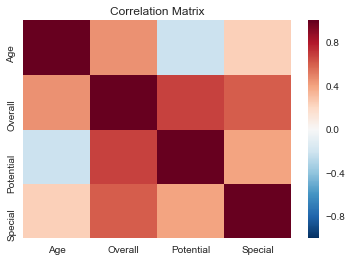

In [70]:
## Step 5: Visualizing correlation
## Create a simple correlation matrix from the results above:

sns.heatmap(Correlation, 
            xticklabels=Correlation.columns.values,
            yticklabels=Correlation.columns.values)
sns.plt.title('Correlation Matrix')
Correlation

So, what does this Correlation Matrix tell about the data?
Generally speeking, age and Overall ability are positively correlated. This shows the importance of looking at your data from different points of view, since we say earlier that average ability indeed went up as age increases, but only up to a certain point, namely age 30.

Ok, what's next: Age and Potential have a negative correlation. Seems logical that younger players are more promissing than players in the latest stage of their career.

Lastly, I would say that the string correlation between Overall ability and the amount of Specialness (probably not a word, but you follow what I am saying...) is important to note.

In [121]:
## OK, last up for this dataset: We can group the set by club and find the Overall ability average of their players.
## Step 6: Create a DataFrame containing clubs and their average Overall scores. Then apply a filter > 76 to see the best teams.

ClubsDataFrame = pd.DataFrame(df.groupby('Club').Overall.mean())
Topclubs = ClubsDataFrame[ClubsDataFrame.Overall > 76]
Topclubs_Sorted = Topclubs.sort_values('Overall', ascending = False, inplace = False)
Topclubs_Sorted

,Overall
Club,
FC Barcelona,82.560000
Juventus,81.653846
Real Madrid CF,81.038462
FC Bayern Munich,79.423077
Paris Saint-Germain,77.964286
Manchester United,77.705882
Napoli,77.653846
Roma,77.370370
Sevilla FC,76.961538


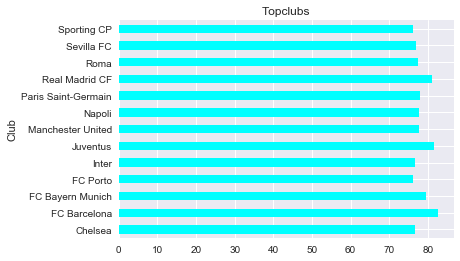

In [134]:
Topclubs.plot(kind = 'barh', colormap = 'cool', legend = False, title = 'Topclubs')